1.Data generation

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# plt.style.use('seaborn')  # Optional: for better looking plots

In [118]:
def generate_data(n=100, mA=(3.0, 0.5), mB=(-3.0, 0.0), sigmaA=0.5, sigmaB=0.5, seed=42):
    np.random.seed(seed)
    classA = np.random.randn(2, n) * sigmaA + np.array(mA).reshape(2,1)
    classB = np.random.randn(2, n) * sigmaB + np.array(mB).reshape(2,1)
    
    X = np.hstack((classA, classB))          # input patterns
    T = np.hstack((np.ones(n), -np.ones(n)))  # labels: +1 for classA, -1 for classB
    
    # Add bias input (always 1)
    X = np.vstack((X, np.ones(2*n)))
    
    # Shuffle
    idx = np.random.permutation(2*n)
    return X[:, idx], T[idx]


In [119]:
# import numpy as np

# # --- Data generation (same as before, simplified) ---
# def generate_data(n=200, mA=(1.0, 0.5), mB=(-1.0, 0.0), sigmaA=0.5, sigmaB=0.5, seed=1):
#     np.random.seed(seed)
#     classA = np.random.randn(2, n) * sigmaA + np.array(mA).reshape(2,1)
#     classB = np.random.randn(2, n) * sigmaB + np.array(mB).reshape(2,1)
    
#     X = np.hstack((classA, classB))          # input patterns
#     T = np.hstack((np.ones(n), -np.ones(n)))  # labels: +1 for classA, -1 for classB
    
#     # Add bias input (always 1)
#     X = np.vstack((X, np.ones(2*n)))
    
#     # Shuffle
#     idx = np.random.permutation(2*n)
#     return X[:, idx], T[idx]

# # Generate small dataset for illustration
# X, T = generate_data(n=200)

# X, T

# Data Visualization
Visualize the generated data points for both classes

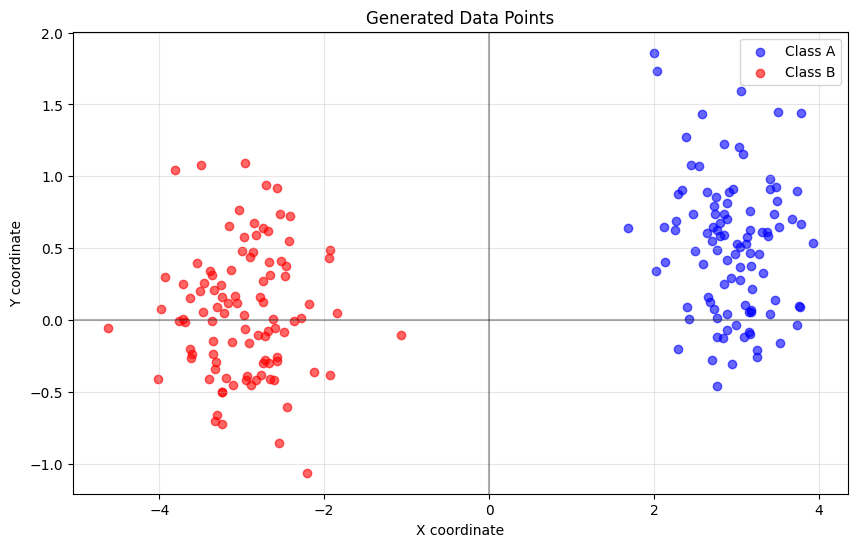

Number of points in Class A: 100
Number of points in Class B: 100


In [120]:
# Generate and visualize data
X, T = generate_data()

plt.figure(figsize=(10, 6))
plt.scatter(X[0, T==1], X[1, T==1], c='blue', label='Class A', alpha=0.6)
plt.scatter(X[0, T==-1], X[1, T==-1], c='red', label='Class B', alpha=0.6)
plt.title("Generated Data Points")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.show()

# Print some statistics
print(f"Number of points in Class A: {np.sum(T==1)}")
print(f"Number of points in Class B: {np.sum(T==-1)}")

# Data Summary Table
Summary statistics of the generated data points

In [121]:
# Create summary statistics
df_stats = pd.DataFrame({
    'Class': ['A', 'B'],
    'Count': [np.sum(T==1), np.sum(T==-1)],
    'Mean X': [np.mean(X[0, T==1]), np.mean(X[0, T==-1])],
    'Mean Y': [np.mean(X[1, T==1]), np.mean(X[1, T==-1])],
    'Std X': [np.std(X[0, T==1]), np.std(X[0, T==-1])],
    'Std Y': [np.std(X[1, T==1]), np.std(X[1, T==-1])]
})

# Format floating point numbers
float_cols = ['Mean X', 'Mean Y', 'Std X', 'Std Y']
df_stats[float_cols] = df_stats[float_cols].round(3)

# Display the table with styling
from IPython.display import display
display(df_stats.style.set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]))

,Class,Count,Mean X,Mean Y,Std X,Std Y
0,A,100,2.948000,0.511000,0.452000,0.474000
1,B,100,-2.968000,0.053000,0.539000,0.440000


2.Perceptron learning and analysis

In [122]:
def perceptron_learning(X, T, epochs=30, eta=0.001):
    W = np.random.randn(1, X.shape[0]) * 0.01
    errors = []

    for _ in range(epochs):
        misclassified = 0
        for i in range(X.shape[1]):
            xi = X[:, i:i+1]  # column vector
            ti = T[i]
            y = np.sign(W @ xi)  # prediction
            if y == 0: y = -1    # handle zero as -1
            if y != ti:
                W += eta * ti * xi.T
                misclassified += 1
        errors.append(misclassified)
    return W, errors


3.Delta rule

In [123]:
def delta_rule_batch(X, T, epochs=30, eta=0.001):
    W = np.random.randn(1, X.shape[0]) * 0.01
    errors = []

    for _ in range(epochs):
        Y = W @ X
        dW = -eta * (Y - T) @ X.T
        W += dW
        # Misclassification count
        misclassified = np.sum(np.sign(W @ X) != T)
        errors.append(misclassified)
    return W, errors


4.Plot decision boundary    

In [124]:
def plot_boundary(X, T, W, title="Decision Boundary"):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[0, T==1], X[1, T==1], c='blue', label='Class A')
    plt.scatter(X[0, T==-1], X[1, T==-1], c='red', label='Class B')
    
    # Line: W·X = 0 → w1*x + w2*y + wb = 0
    x_vals = np.linspace(np.min(X[0,:])-1, np.max(X[0,:])+1, 100)
    y_vals = -(W[0,0]*x_vals + W[0,2]) / W[0,1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
    
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


5.Example

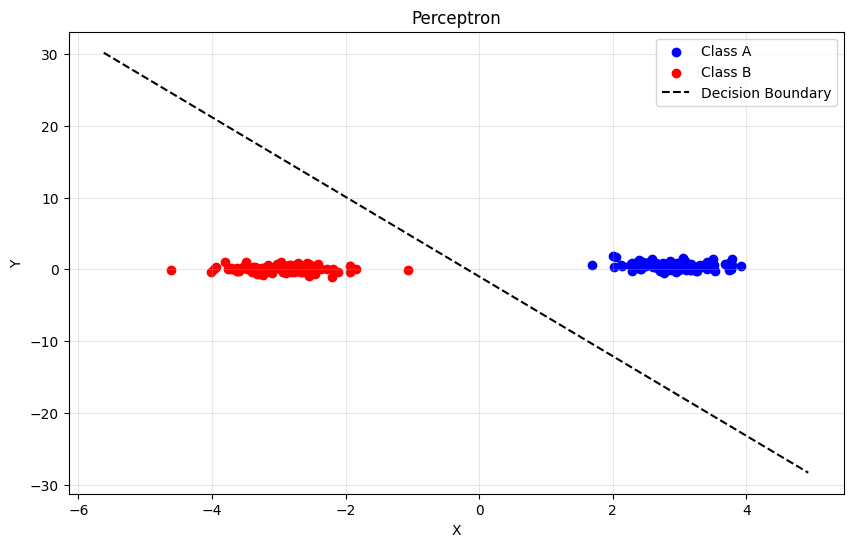

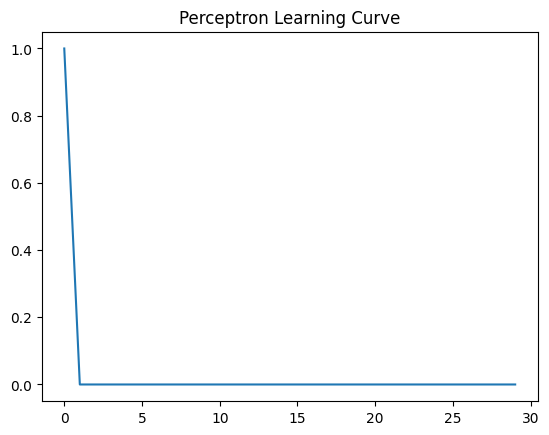

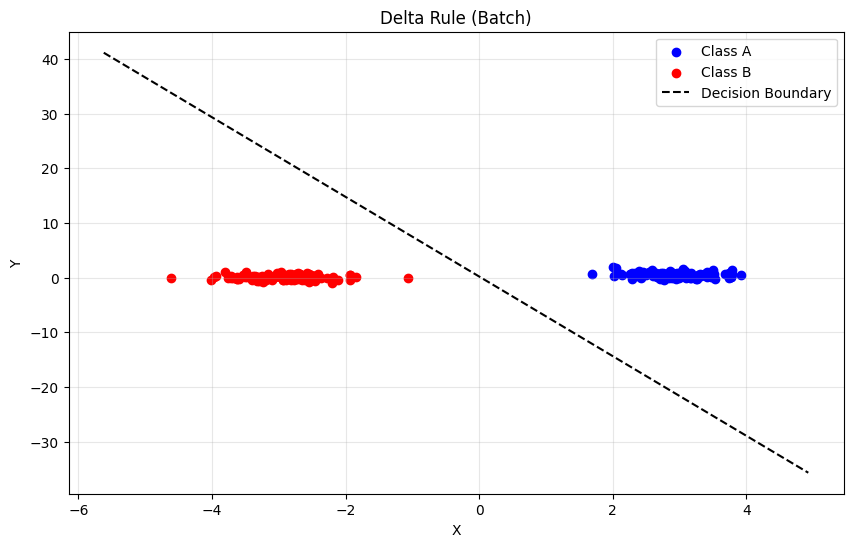

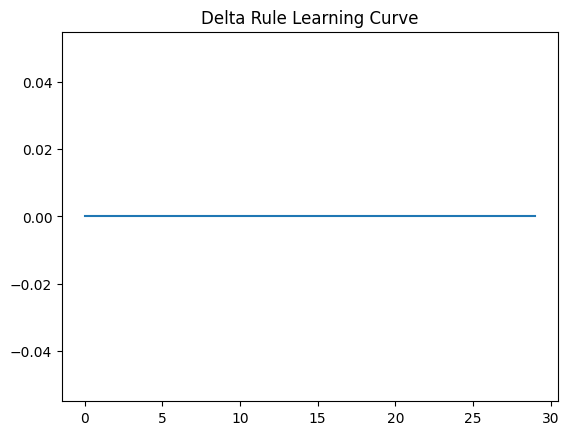

In [125]:
if __name__ == "__main__":
    X, T = generate_data()
    
    # Perceptron
    W_p, err_p = perceptron_learning(X, T, epochs=30, eta=0.01)
    plot_boundary(X, T, W_p, "Perceptron")
    plt.plot(err_p); plt.title("Perceptron Learning Curve"); plt.show()

    # Delta Rule (Batch)
    W_d, err_d = delta_rule_batch(X, T, epochs=30, eta=0.001)
    plot_boundary(X, T, W_d, "Delta Rule (Batch)")
    plt.plot(err_d); plt.title("Delta Rule Learning Curve"); plt.show()
